# Analysis of Rental Bike Sharing in Washington, DC


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

In [2]:
#read csv dataset

df = pd.read_csv(r"C:\Users\suren\Documents\Datasets-Projects\bike sharing data\day.csv")

## Dataset

The bike sharing dataset was sourced from UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

The core dataset is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. The data has been aggregated on daily basis, the corresponding weather and seasonal information was then extracted and added. Weather information was extracted from http://www.freemeteo.com. 

<b>Characteristics

instant: record index<br> 
dteday : date<br> 
season : season (1: springe, 2: summer, 3: fall, 4: winter)<br> 
yr : year (0: 2011, 1: 2012)<br> 
mnth : month (1 to 12)<br> 
holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)<br> 
weekday : day of the week<br> 
workingday : if day is neither weekend nor holiday the value is 1, otherwise it is 0.<br> 
weathersit : <br> 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br> 
temp : Normalized temperature in Celsius. The values are divided to 41 (max)<br> 
atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)<br> 
hum: Normalized humidity. The values are divided to 100 (max)<br> 
windspeed: Normalized wind speed. The values are divided to 67 (max)<br> 
casual: count of casual users<br> 
registered: count of registered users<br> 
cnt: count of total rental bikes including both casual and registered<br> 



## Exploratory Data Analysis

In [3]:
#find the structure of the dataset

df.shape

(731, 16)

The dataset contains 731 rows and 16 columns.

In [4]:
#first five rows of data

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#check the data type of each column

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

All of the columns are of either int64 or float64 data type except for dteday.

In [6]:
#basic summary statistics of the dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The average number of bikes rented was **4,504**. <br>
The median number of bikes rented was **4,548**.

In [7]:
#check for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing/null values in this dataset.

In [8]:
#converting dteday column to datetime data type

df['dteday']=pd.to_datetime(df['dteday'], format='%Y/%m/%d')

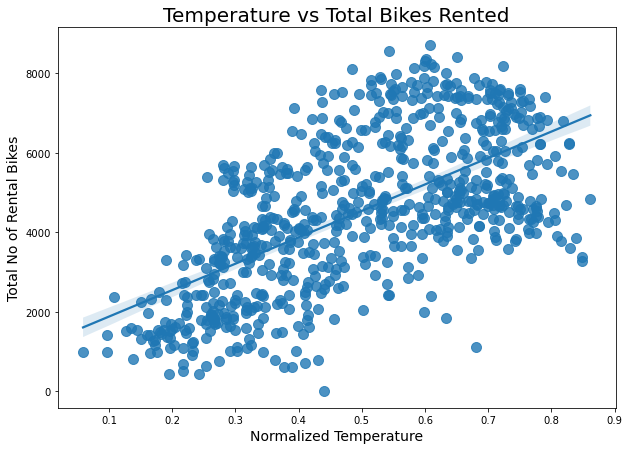

In [9]:
#scatter plot for temp vs count

plt.figure(figsize=(10,7))
sns.regplot(data=df, x='temp', y='cnt', scatter_kws={'s': 100})

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Normalized Temperature', fontsize=14)
plt.title('Temperature vs Total Bikes Rented', fontsize=20)

plt.show()

The above plot suggests that temperature is positively correlated with the number of bikes rented.

In [10]:
#using corr() method to find the other features that are correlated to count
df.corr()['cnt'].sort_values()

weathersit   -0.297391
windspeed    -0.234545
hum          -0.100659
holiday      -0.068348
workingday    0.061156
weekday       0.067443
mnth          0.279977
season        0.406100
yr            0.566710
temp          0.627494
instant       0.628830
atemp         0.631066
casual        0.672804
registered    0.945517
cnt           1.000000
Name: cnt, dtype: float64

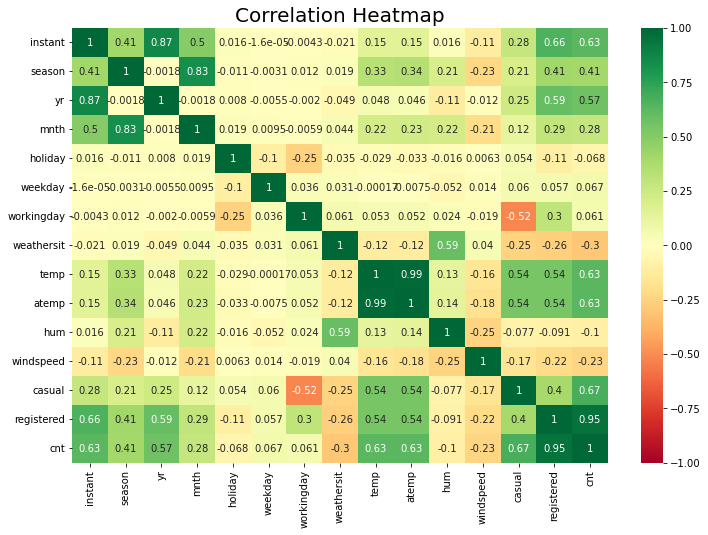

In [11]:
#Correlation heatmap for all variables

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True, vmin=-1, fmt='.2g')

plt.title("Correlation Heatmap", fontsize=20)
plt.show()

The count of bikes rented is positively correlated to 'temp', 'atemp', and negatively correlated to 'windspeed', 'weathersit' (weather condition), and 'hum'.

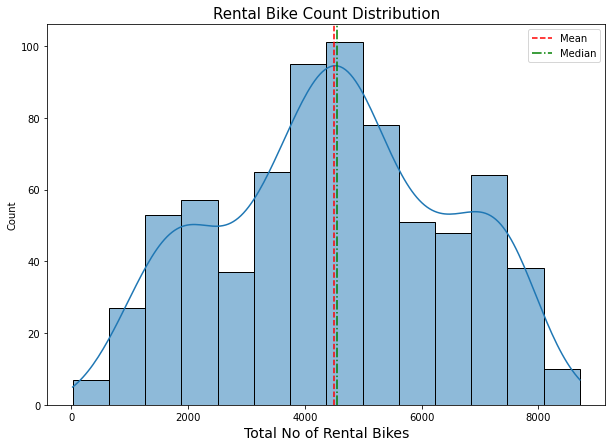

In [12]:
#Distribution of count

plt.figure(figsize=(10,7))

sns.histplot(data=df, x='cnt', kde=True)

#calculate mean of count

count_mean = df['cnt'].mean()
count_median = df['cnt'].median()

plt.xlabel('Total No of Rental Bikes', fontsize=14)
plt.axvline(x=count_mean, color='red', linestyle='--', label= 'Mean')
plt.axvline(x=count_median, color='green', linestyle ='-.', label='Median')
plt.title('Rental Bike Count Distribution', fontsize=15)
plt.legend()

plt.show()

The resulting distribution is close to a normal distribution although not a perfect bell curve, with the average and median values being almost equal. 

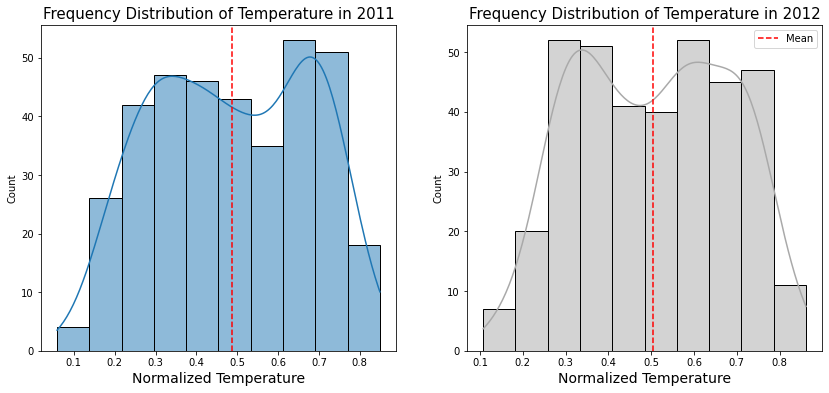

In [13]:
#Distribution of temperature in 2011 and 2012

df2011 = df[df['yr']==0]

df2012 = df[df['yr']==1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df2011, x='temp', ax=axes[0], kde=True)
sns.histplot(data=df2012, x='temp', ax=axes[1], kde=True, color='darkgrey')

axes[0].set_title("Frequency Distribution of Temperature in 2011", fontsize=15)
axes[0].set_xlabel("Normalized Temperature", fontsize=14)
axes[0].axvline(x=df2011['temp'].mean(), color='red', linestyle='--', label= 'Mean')


axes[1].set_title("Frequency Distribution of Temperature in 2012", fontsize=15)
axes[1].set_xlabel("Normalized Temperature", fontsize=14)
axes[1].axvline(x=df2012['temp'].mean(), color='red', linestyle='--', label= 'Mean')

plt.legend()

plt.show()

The distribution of temperature for both 2011 and 2012 represents a bimodal distribution.

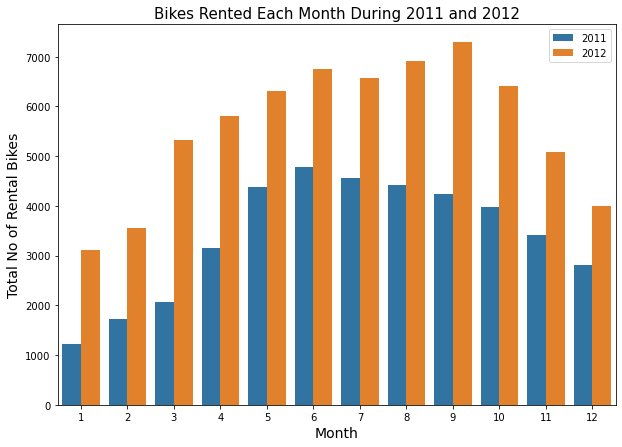

In [14]:
#Bar plot to visualize total number of bikes rented each month in 2011 and 2012

plt.figure(figsize=(10,7))
sns.barplot(data =df, x='mnth', y='cnt', hue='yr', ci=None)


plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Bikes Rented Each Month During 2011 and 2012', fontsize=15)
plt.legend(labels=['2011','2012'])

plt.show()

The above plot clearly indicates that the usage of rental bikes increased from 2011 to 2012. 

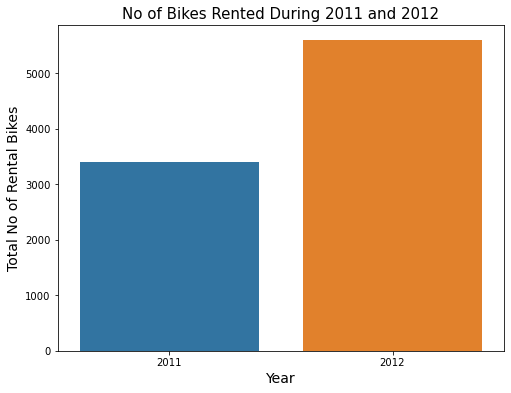

In [15]:
#No of bikes rented in 2011 and 2012

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='yr', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('No of Bikes Rented During 2011 and 2012', fontsize=15)
plt.xticks(ticks=range(len('yr')), labels=['2011', '2012'])

plt.show()

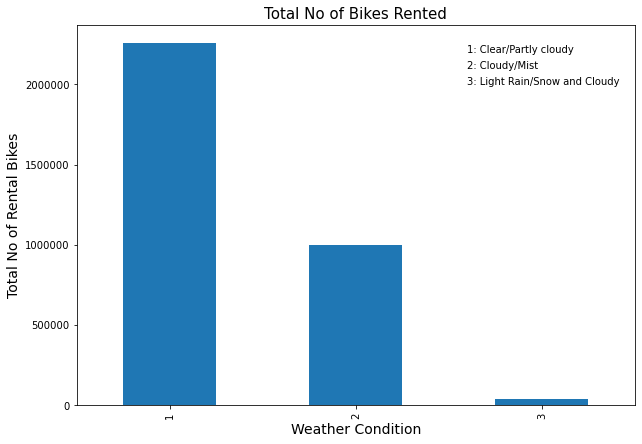

In [16]:
#number of bikes rented and weather condition

plt.figure(figsize=(10,7))
plt.ticklabel_format(style='plain')

wea_df = df.groupby('weathersit')['cnt'].sum().plot(kind='bar')

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Weather Condition', fontsize=14)
plt.title('Total No of Bikes Rented', fontsize=15)
plt.text(1.6, 2200000, '1: Clear/Partly cloudy')
plt.text(1.6, 2100000, '2: Cloudy/Mist')
plt.text(1.6, 2000000, '3: Light Rain/Snow and Cloudy')

plt.show()

A large number of bikes were rented when the conditions wear clear compared to cloudy, and rainy days.

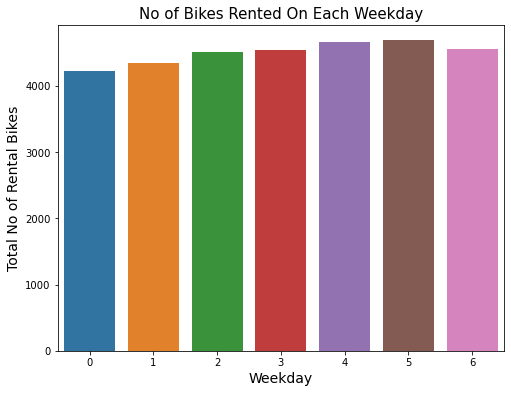

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [17]:
#Bikes rented on each weekday

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='weekday', y='cnt', ci=None)

plt.ylabel('Total No of Rental Bikes', fontsize=14)
plt.xlabel('Weekday', fontsize=14)
plt.title('No of Bikes Rented On Each Weekday', fontsize=15)

plt.show()

df.groupby('weekday')['cnt'].sum()

Weekday starts with 0: Sunday, and ends with 6: Saturday.
The least number of bikes were rented on **Sunday (444,027)**, and the highest was **Friday (487,790)**.

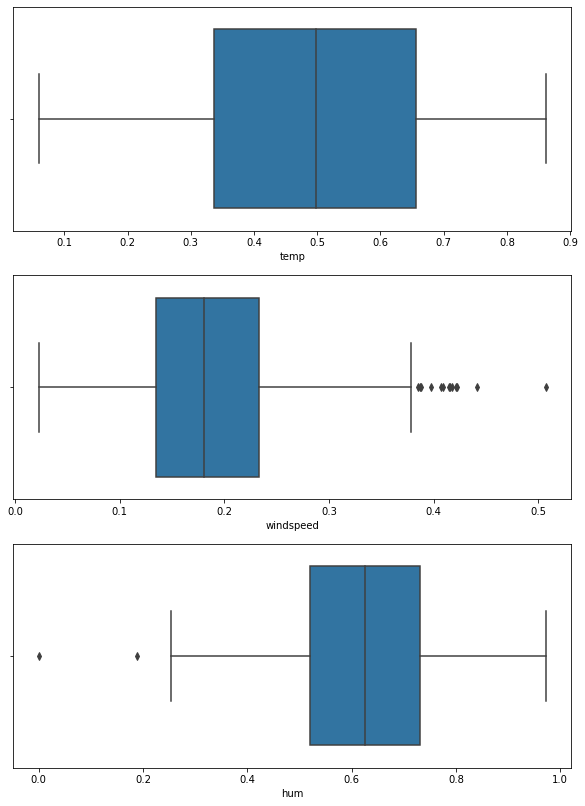

In [18]:
#boxplots for temp, windspeed, and hum

fig, axes = plt.subplots(3, 1, figsize=(10, 14))

sns.boxplot(data=df, x='temp', ax=axes[0])
sns.boxplot(data=df, x='windspeed', ax=axes[1])
sns.boxplot(data=df, x='hum', ax=axes[2])

plt.show()